# Modelando

In [1]:
# Importando as bibliotecas necessárias
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.neighbors import NearestNeighbors
from sklearn.model_selection import train_test_split

In [2]:
# Carregando os datasets prontos para uso
market = pd.read_csv('market_parte_3.csv', true_values='True', false_values='False')
portifolio1 = pd.read_csv('portfolio1_parte_3.csv')
portifolio2 = pd.read_csv('portfolio2_parte_2.csv')
portifolio3 = pd.read_csv('portfolio3_parte_2.csv')

# Carregando os datasets originais
portifolio1_original = pd.read_csv('data\\estaticos_portfolio1.csv')
portifolio2_original = pd.read_csv('data\\estaticos_portfolio2.csv')
portifolio3_original = pd.read_csv('data\\estaticos_portfolio3.csv')
mercado_original = pd.read_csv('data\\estaticos_market.csv')

# Dropando as colunas desnecessárias dos datasets originais
portifolio1_original.drop('Unnamed: 0', axis=1, inplace=True)
portifolio2_original.drop('Unnamed: 0', axis=1, inplace=True)
portifolio3_original.drop('Unnamed: 0', axis=1, inplace=True)
mercado_original.drop('Unnamed: 0', axis=1, inplace=True)

In [3]:
market.head(3)

,id,dt_situacao,fl_matriz,de_natureza_juridica,sg_uf,natureza_juridica_macro,de_ramo,setor,idade_empresa_anos,idade_emp_cat,...,qt_socios_pf,qt_socios_pj,idade_media_socios,idade_maxima_socios,idade_minima_socios,qt_socios_st_regular,de_faixa_faturamento_estimado,de_faixa_faturamento_estimado_grupo,vl_faturamento_estimado_aux,vl_faturamento_estimado_grupo_aux
0,a6984c3ae395090e3bee8ad63c3758b110de096d5d8195...,2005-03-25,1,60,4,2,11,2,14.457534,3,...,2.0,0.0,44.0,47.0,41.0,2.000000,4.0,4.0,3132172.8,3132172.8
1,6178f41ade1365e44bc2c46654c2c8c0eaae27dcb476c4...,2017-05-12,1,17,3,5,21,4,1.463014,1,...,1.0,0.0,27.0,27.0,27.0,1.000000,2.0,2.0,210000.0,210000.0
2,4a7e5069a397f12fdd7fd57111d6dc5d3ba558958efc02...,2011-09-26,1,17,1,5,32,4,7.093151,2,...,1.0,0.0,32.0,32.0,32.0,1.396082,1.0,1.0,50000.0,50000.0


In [4]:
# Separando as empresas em cada portifólio
portifolio1 = portifolio1[['id']].merge(market, how='inner', on='id')
portifolio2 = portifolio2.merge(market, how='inner', on='id')
portifolio3 = portifolio3.merge(market, how='inner', on='id')

In [5]:
portifolio2.head()

,id,dt_situacao,fl_matriz,de_natureza_juridica,sg_uf,natureza_juridica_macro,de_ramo,setor,idade_empresa_anos,idade_emp_cat,...,qt_socios_pf,qt_socios_pj,idade_media_socios,idade_maxima_socios,idade_minima_socios,qt_socios_st_regular,de_faixa_faturamento_estimado,de_faixa_faturamento_estimado_grupo,vl_faturamento_estimado_aux,vl_faturamento_estimado_grupo_aux
0,09e95c1a84049001d086470a8f320a19b076f955a89122...,2007-08-03,1,1,0,0,0,4,11.243835,3,...,1.476681,0.019645,42.816250,44.34413,41.355225,1.396082,9.0,8.0,327487200.0,327487200.0
1,dc9d155f5bcd3172031e2ec9431786e8871ff4b0ff4728...,2004-12-11,1,33,4,5,0,4,43.789040,5,...,1.476681,0.019645,42.816250,44.34413,41.355225,1.396082,8.0,9.0,176802910.0,176802910.0
2,16843c9ffb920170477118933798510d8d5f00f5c56c12...,2005-09-24,1,64,3,2,22,4,16.389042,4,...,2.000000,0.000000,70.000000,70.00000,70.000000,1.000000,6.0,6.0,27818640.0,27818640.0
3,ff045934d90aab184dd15e66daf3b3c97193bda5449298...,2005-09-24,1,33,1,5,0,4,39.671234,5,...,1.476681,0.019645,42.816250,44.34413,41.355225,1.396082,8.0,9.0,221518800.0,221518800.0
4,a0ce528caab2c62497a548d0ebd9e935143ef81ed7dbf0...,2005-11-03,1,60,4,2,17,0,20.268494,5,...,4.000000,0.000000,48.666668,70.00000,36.000000,3.000000,6.0,6.0,28127736.0,28127736.0


In [6]:
# Setando o index com os ids
portifolio1.set_index(keys='id', inplace=True)
portifolio2.set_index(keys='id', inplace=True)
portifolio3.set_index(keys='id', inplace=True)
market.set_index(keys='id', inplace=True)

In [7]:
# Retirando as colunas desnecessárias
market.drop('dt_situacao', axis=1, inplace=True)

In [8]:
# Selecionando as colunas
portifolio1 = portifolio1[market.columns]
portifolio2 = portifolio2[market.columns]
portifolio3 = portifolio3[market.columns]

In [9]:
# Definindo uma função que troca "bool" para "int"
def troca_bool_para_numero(df):
    
    # Separando as colunas que serão tratadas
    colunas_object = ['fl_spa', 'fl_antt', 'fl_veiculo', 'fl_simples_irregular', 'fl_passivel_iss']
    df[colunas_object] = df[colunas_object].astype(bool)

    # Selecionando as colunas de interesse
    colunas_bool = [coluna for coluna in df.dtypes[df.dtypes == 'bool'].index]
    
    # Laço para iterar em todas as colunas de interesse
    for coluna in colunas_bool:

        # Realizando a troca
        df[coluna] = [1 if valor == True else 0 for valor in df[coluna]]
    
    # Retornando um DataFrame com "int" no lugar de "bool"
    return df

In [10]:
# Chamando a função troca_bool_para_numero() para cada DataFrame
portifolio1 = troca_bool_para_numero(portifolio1)
portifolio2 = troca_bool_para_numero(portifolio2)
portifolio3 = troca_bool_para_numero(portifolio3)
market = troca_bool_para_numero(market)

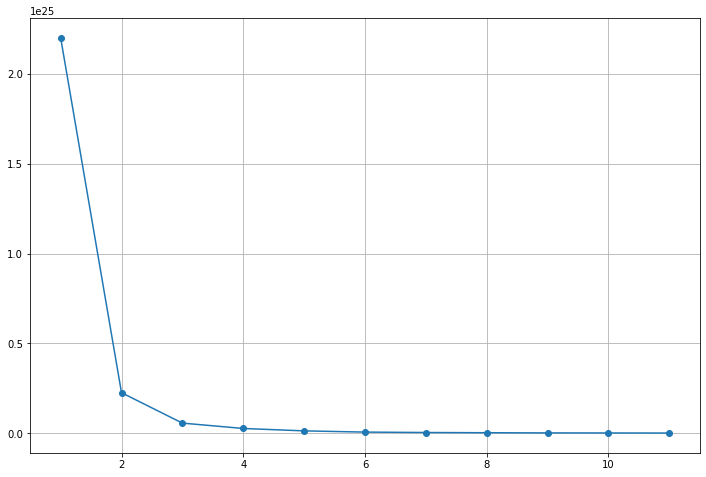

Wall time: 1min 53s


In [11]:
%%time
inertia = []
for i in range(1, 12):
    kmeans = KMeans(n_clusters=i, random_state=42)
    kmeans.fit(market)
    inertia.append((i, kmeans.inertia_,))

plt.figure(figsize=(12, 8))
plt.grid(True)
plt.plot([w[0] for w in inertia], [w[1] for w in inertia], marker='o')
plt.show()

In [12]:
n_clusters = 3
market['Predito'] = False
#market.insert()

In [16]:
def recomenda_leads(df_portfolio):
    
    # Fazendo uma cópis do DataFramne market
    market_cluster = market.copy()

    # Instanciando a classe KMeans
    kmeans = KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=10,
                    n_clusters=n_clusters, n_init=30, n_jobs=None, precompute_distances='auto',
                    random_state=42, tol=0.0001, verbose=0)

    # Treinando o modelo
    kmeans.fit(market_cluster.drop(df_portfolio.index.to_list(), axis=0))

    # Salvando os clusters definidos pelo Kmeans de cada emrpesa do portfólio
    clusters_portfolio = kmeans.labels_

    # Salvando as distâncias para os clusters dos dados do portfólio
    distancia_portfolio = kmeans.transform(df_portfolio)
    distancia_portfolio = pd.DataFrame(distancia_portfolio)

    # Salvando nos dados do mercado os clusters previstos
    clusters_market =  kmeans.predict(market)
    market_cluster['Cluster'] = clusters_market

    # Salvando as distâncias para os clusters dos dados do mercado
    distancia_market = kmeans.transform(market)
    distancia_market = pd.DataFrame(distancia_market)

    # Salvando lista das distâncias de cada cluster dos dados do portfólio
    dist_port_cluster0 = (distancia_portfolio[0][clusters_portfolio == 0]).to_list()
    dist_port_cluster1 = (distancia_portfolio[1][clusters_portfolio == 1]).to_list()
    dist_port_cluster2 = (distancia_portfolio[2][clusters_portfolio == 2]).to_list()

    # Com base na distribuição de distâncias de cada cluster,
        # pegar um limite máximo aceitavel para prever no mercado mais a frente
    if dist_port_cluster0:
        limite_max_cluster0 = np.quantile(dist_port_cluster0, 0.95)

    if dist_port_cluster1:
        limite_max_cluster1 = np.quantile(dist_port_cluster1, 0.95)

    if dist_port_cluster2:
        limite_max_cluster2 = np.quantile(dist_port_cluster2, 0.95)

    #market_cluster.insert(10, 'predito', False)

    # Para cada Cluster:
    # pegar dados mercado.
    # pegar as distâncias previstas desses dados. 
    # definir um dataset de predições com as emrpesas que tenham distância dentro so limite estabelecido para o cluster
    # se estiver dentro do limite, setar coluna "predito" no data set principal para TRUE

    market_cluster0 = (market_cluster[:][clusters_market == 0])
    dist_mkt_cluster0  = np.array(distancia_market[0][clusters_market == 0])
    preditos_cluster0 = mkt_cluster0[:][dist_mkt_cluster0 <= limite_max_cluster0]
    market_cluster['Predito'][market_cluster.index.isin(preditos_cluster0.index)] = True

    market_cluster1       = (market_cluster[:][clusters_market == 1])
    dist_mkt_cluster1  = np.array(distancia_market[1][clusters_market == 1])
    preditos_cluster1 = mkt_cluster1[:][dist_mkt_cluster1 <= limite_max_cluster1]
    market_cluster['Predito'][market_cluster.index.isin(preditos_cluster1.index)] = True

    market_cluster2       = (market_cluster[:][clusters_market == 2])
    dist_mkt_cluster2  = np.array(distancia_market[2][clusters_market == 2])
    preditos_cluster2 = mkt_cluster2[:][dist_mkt_cluster2 <= limite_max_cluster2]
    market_cluster['Predito'][market_cluster.index.isin(preditos_cluster2.index)] = True

    cli_atual = market_cluster.index.isin(pt.id) 

    df_result = market_cluster.copy()

    df_result.insert(11, 'already_client', cli_atual)

    df_leads_pt_kmeans = df_result.loc[(df_result['Predito']==True) & (df_result['already_client']==False)]

    #mensurando acertos com os leads esperados, que eu já sei que são meus, ou seja, já são meus clientes 
    #observar que defini similaridade com 95% por isso não são retornados o total original deste portfólio
    df_leads_esperados = df_result.loc[(df_result['predito']==True) & (df_result['already_client']==True)]

    precisao_acertos = len(df_leads_esperados.index) / len(df_portfolio.index)

    print(precisao_acertos)

In [18]:
#%%time
#recomenda_leads(portifolio1)

In [11]:
# Definindo uma função que faz as recomendações
def recomenda_empresas(df_portifolio):
    
    # Instanciando a classe NearestNeighbors()
    knn = NearestNeighbors(n_neighbors=1)
    
    # Treinando o modelo
    knn.fit(market.drop(df_portifolio.index.to_list(), axis=0))
    
    # Encontrando as recomendações
    resposta = knn.kneighbors(df_portifolio, return_distance=False)
    
    # Criando um DataFrame vazio para armazenar as recomendações
    df = pd.DataFrame()
    
    # Organizando a saída
    for index in resposta:
        empresa = pd.DataFrame(market.iloc[index[0], :])
        df = pd.concat([df, empresa.T])
    
    # Pegando apenas os ids das empresas recomendadas
    indices = pd.DataFrame(df.index)
    
    # Renomeando a coluna com os ids
    indices.rename(columns={0: 'id'}, inplace=True)
    
    # Melhorando a visualização da saída
    recomendacoes = indices.merge(mercado_original, on='id')
    
    # Retornando as empresas recomendadas
    return recomendacoes

In [12]:
%%time
teste1 = recomenda_empresas(portifolio1)

Wall time: 5min 17s


In [13]:
teste1.head()

,id,fl_matriz,de_natureza_juridica,sg_uf,natureza_juridica_macro,de_ramo,setor,idade_empresa_anos,idade_emp_cat,fl_me,...,media_meses_servicos,max_meses_servicos,min_meses_servicos,qt_funcionarios,qt_funcionarios_12meses,qt_funcionarios_24meses,tx_crescimento_12meses,tx_crescimento_24meses,tx_rotatividade,qt_filiais
0,3366a3e0db1e1c32fd44b1d5ae9e25a7fd8bb489b4ec7e...,True,EMPRESARIO INDIVIDUAL,PI,OUTROS,COMERCIO VAREJISTA,COMERCIO,31.054795,> 20,False,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
1,8dc2aa454b69594b6e85a22e2f254d635f038523db209c...,False,SOCIEDADE EMPRESARIA LIMITADA,MA,ENTIDADES EMPRESARIAIS,COMERCIO VAREJISTA,COMERCIO,10.821918,10 a 15,False,...,85.666667,121.0,15.000000,3.0,4.0,2.0,-25.0,50.0,0.0,1
2,236d0d6fa63558aba8d2a523f8dd8346ecc09ed6944b57...,True,SOCIEDADE EMPRESARIA LIMITADA,MA,ENTIDADES EMPRESARIAIS,COMERCIO VAREJISTA,COMERCIO,19.194521,15 a 20,False,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
3,e437ebca4bdb865e5dcccfb26a97d02e60c122a3f82a1b...,True,ASSOCIACAO PRIVADA,PI,ENTIDADES SEM FINS LUCRATIVOS,SERVICOS DIVERSOS,SERVIÇO,19.515068,15 a 20,False,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
4,cd624fd08df61cb9df9ce9d210810af3f306300eed5c7c...,True,SOCIEDADE EMPRESARIA LIMITADA,PI,ENTIDADES EMPRESARIAIS,INDUSTRIA DA CONSTRUCAO,CONSTRUÇÃO CIVIL,3.939726,1 a 5,False,...,3.406667,3.7,3.333333,10.0,0.0,0.0,NaN,NaN,0.0,0


In [18]:
%%time
teste2 = recomenda_empresas(portifolio2)

Wall time: 3min 29s


In [19]:
teste2.head()

,id,fl_matriz,de_natureza_juridica,sg_uf,natureza_juridica_macro,de_ramo,setor,idade_empresa_anos,idade_emp_cat,fl_me,...,media_meses_servicos,max_meses_servicos,min_meses_servicos,qt_funcionarios,qt_funcionarios_12meses,qt_funcionarios_24meses,tx_crescimento_12meses,tx_crescimento_24meses,tx_rotatividade,qt_filiais
0,64279521284724b8326eebcc4a32f629aa49989970b305...,True,EMPRESARIO INDIVIDUAL,AM,OUTROS,COMERCIO VAREJISTA,COMERCIO,7.243836,5 a 10,False,...,64.766667,71.9,58.666667,4.0,4.0,4.0,0.0,0.0,0.0,0
1,64279521284724b8326eebcc4a32f629aa49989970b305...,True,EMPRESARIO INDIVIDUAL,AM,OUTROS,COMERCIO VAREJISTA,COMERCIO,7.243836,5 a 10,False,...,64.766667,71.9,58.666667,4.0,4.0,4.0,0.0,0.0,0.0,0
2,8b556490c8ed38cab1f2da7fc36fdf0c20f8d9d961def4...,True,EMPRESARIO INDIVIDUAL,MA,OUTROS,COMERCIO VAREJISTA,COMERCIO,5.205479,5 a 10,False,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
3,5da9ac94662931dfa3e02f769e3120367c5c565f7316f9...,True,CONDOMINIO EDILICIO,RN,ENTIDADES SEM FINS LUCRATIVOS,SERVICOS ADMINISTRATIVOS,SERVIÇO,6.698630,5 a 10,False,...,NaN,NaN,NaN,0.0,1.0,1.0,-100.0,-100.0,0.0,0
4,8abf71fede61cf9f36e4d349fe16d88dbf99216c375290...,True,EMPRESARIO INDIVIDUAL,RN,OUTROS,"TRANSPORTE, ARMAZENAGEM E CORREIO",SERVIÇO,1.202740,1 a 5,False,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0


In [20]:
%%time
teste3 = recomenda_empresas(portifolio3)

Wall time: 3min 37s


In [21]:
teste3.head()

,id,fl_matriz,de_natureza_juridica,sg_uf,natureza_juridica_macro,de_ramo,setor,idade_empresa_anos,idade_emp_cat,fl_me,...,media_meses_servicos,max_meses_servicos,min_meses_servicos,qt_funcionarios,qt_funcionarios_12meses,qt_funcionarios_24meses,tx_crescimento_12meses,tx_crescimento_24meses,tx_rotatividade,qt_filiais
0,a76b3a396471ed553a05c46cf050a96a71b3a33eddcebd...,True,EMPRESARIO INDIVIDUAL,MA,OUTROS,SERVICOS DIVERSOS,SERVIÇO,4.221918,1 a 5,False,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
1,c3a8d2476b2663a4f1df922ebfd23f6cfe78f1afd745e4...,True,EMPRESARIO INDIVIDUAL,MA,OUTROS,COMERCIO VAREJISTA,COMERCIO,5.476712,5 a 10,False,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
2,c3a8d2476b2663a4f1df922ebfd23f6cfe78f1afd745e4...,True,EMPRESARIO INDIVIDUAL,MA,OUTROS,COMERCIO VAREJISTA,COMERCIO,5.476712,5 a 10,False,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
3,c3a8d2476b2663a4f1df922ebfd23f6cfe78f1afd745e4...,True,EMPRESARIO INDIVIDUAL,MA,OUTROS,COMERCIO VAREJISTA,COMERCIO,5.476712,5 a 10,False,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
4,74fe340806ea2d304cbbdf3386b030c9c25c342cd6c0af...,True,SOCIEDADE EMPRESARIA LIMITADA,PI,ENTIDADES EMPRESARIAIS,COMERCIO VAREJISTA,COMERCIO,5.249315,5 a 10,False,...,NaN,NaN,NaN,0.0,4.0,7.0,-100.0,-100.0,200.0,2
